# Demostrating Epistasis Calculations from EnsembleModel

This notebook demonstrates how the EnsembleModel object can be used to calculate epistasis from an ensemble of epistasis models with different reference states.

In [1]:
import numpy as np
from epistasis.core.utils import generate_binary_space
from epistasis.models import LocalEpistasisModel

Build a toy binary genotype-phenotype map, between two sequences, for the following example. The errors around each phenotype is 5%.

In [9]:
seq1 = 'AAAA'
seq2 = 'VVVV'
genotypes = generate_binary_space(seq1,seq2)
phenotypes = np.random.rand(len(genotypes))
errors = phenotypes*0.05

# EnsembleModel

The `EnsembleModel` object calculates the ensemble average of all epistatic terms in a genotype-phenotype map. This works by taking any epistasis model object as an argument and estimating epistatic interaction from different reference (wildtype) states. The average value of each interaction can be calculated from this ensemble. 

In [10]:
from epistasis.ensemble import EnsembleModel

In [11]:
# Build an instance of the EnsembleModel object.
ensemble = EnsembleModel(LocalEpistasisModel, genotypes, phenotypes)

In [12]:
# Number of models to use when building the ensemble
N = 30
# Build the ensemble, can be very slow if space is large. 
ensemble.build_ensemble(N)

## Plotting Ensembles

The plotting module includes a bar graphing method for ensemble averages.

In [14]:
%matplotlib inline
from epistasis.plotting import ensemble_bar

(<matplotlib.figure.Figure at 0x111d92190>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1113a30d0>)

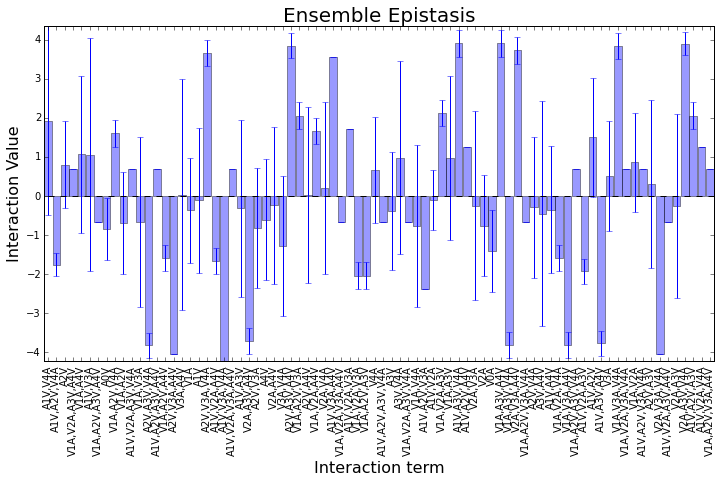

In [15]:
ensemble_bar(ensemble)